In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Create a simple fully connected neural network model
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(28*28))

# Compile the model
model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_images, epochs=5, batch_size=64, validation_data=(test_images, test_images))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_images)
print(f'Test accuracy: {test_acc}')




Epoch 1/5


938/938 [==============================] - 2s 2ms/step - loss: 0.0181 - accuracy: 0.0123 - val_loss: 0.0088 - val_accuracy: 0.0127
Epoch 2/5
938/938 [==============================] - 1s 1ms/step - loss: 0.0080 - accuracy: 0.0144 - val_loss: 0.0072 - val_accuracy: 0.0136
Epoch 3/5
938/938 [==============================] - 1s 1ms/step - loss: 0.0071 - accuracy: 0.0138 - val_loss: 0.0068 - val_accuracy: 0.0135
Epoch 4/5
938/938 [==============================] - 1s 1ms/step - loss: 0.0068 - accuracy: 0.0143 - val_loss: 0.0066 - val_accuracy: 0.0143
Epoch 5/5
313/313 [==============================] - 0s 702us/step - loss: 0.0063 - accuracy: 0.0145
Test accuracy: 0.014499999582767487


313/313 [==============================] - 0s 575us/step


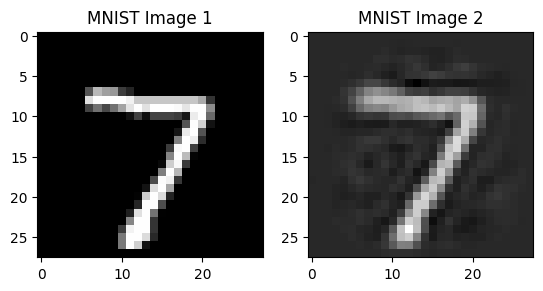

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have an MNIST image with shape (784,)
recovered_image = model.predict(test_images)[0]
original_image = test_images[0]
# Reshape the image to 28x28
recovered_image = recovered_image.reshape(28, 28)
original_image = original_image.reshape(28, 28)
# Display the image using Matplotlib
# Display the images side by side using Matplotlib
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('MNIST Image 1')

plt.subplot(1, 2, 2)
plt.imshow(recovered_image, cmap='gray')
plt.title('MNIST Image 2')

plt.show()